In [92]:
from pandas import DataFrame

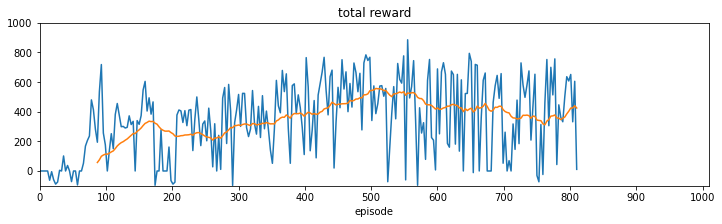

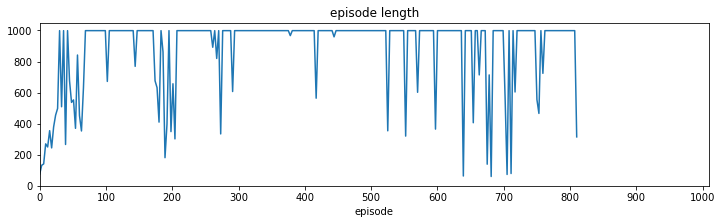

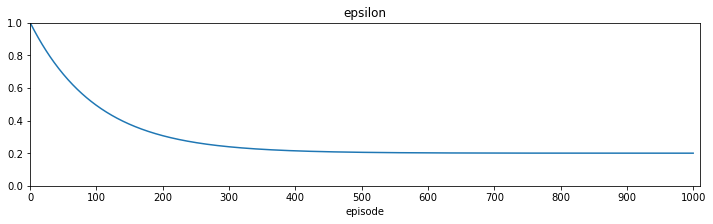

In [98]:
with open('result.txt', 'rt') as f:
    lines = f.readlines()
    rewards = list(map(lambda line: float(line.split(',')[-1].rstrip()), lines))
    length = list(map(lambda line: float(line.split(',')[-2].rstrip()), lines))

epsilon = 1.0
epsilon_list = []
for _ in range(0, 1001):
    epsilon_list.append(epsilon)
    epsilon = (epsilon - 0.2) * 0.99 + 0.2

rewards_df = DataFrame(
    rewards, columns=['total reward'], index=range(0, len(rewards)*3, 3))
length_df = DataFrame(
    length, columns=['episode length'], index=range(0, len(length)*3, 3))
epsilon_df = DataFrame(epsilon_list, columns=['epsilon'])

rewards_df['moving average']=rewards_df['total reward'].rolling(30).mean()

_ = rewards_df.plot(title='total reward', legend=False, xlabel='episode', 
                    xlim=(0, 1010), ylim=(-100, 1000), xticks=range(0, 1001, 100),
                    figsize=(12, 3))
_ = length_df.plot(title='episode length', legend=False, xlabel='episode',
                    xlim=(0, 1010), ylim=(0, 1050), xticks=range(0, 1001, 100),
                    figsize=(12, 3))
_ = epsilon_df.plot(title='epsilon', legend=False, xlabel='episode',
                    xlim=(0, 1010), ylim=(0, 1), xticks=range(0, 1001, 100),
                    figsize=(12, 3))